# Student Performance Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 35)
data = pd.read_csv("student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
data.shape

(395, 33)

## Transforming object values to numerical values

In [5]:
copy = data

In [6]:
copy.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [7]:
data.dtypes[data.dtypes==object]

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

In [8]:
all_objects = list(data.dtypes[data.dtypes==object].index)
for i in all_objects:
    print(copy[i].value_counts())
    print("-"*50)

GP    349
MS     46
Name: school, dtype: int64
--------------------------------------------------
F    208
M    187
Name: sex, dtype: int64
--------------------------------------------------
U    307
R     88
Name: address, dtype: int64
--------------------------------------------------
GT3    281
LE3    114
Name: famsize, dtype: int64
--------------------------------------------------
T    354
A     41
Name: Pstatus, dtype: int64
--------------------------------------------------
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
--------------------------------------------------
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
--------------------------------------------------
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
--------------------------------------------------
mother    273
father     90
other      32
Name: guar

In [9]:
for i in all_objects:
    copy[i] = copy[i].astype('category')
    copy[i] = copy[i].cat.codes
    print(copy[i].value_counts())
    print("-"*50)

0    349
1     46
Name: school, dtype: int64
--------------------------------------------------
0    208
1    187
Name: sex, dtype: int64
--------------------------------------------------
1    307
0     88
Name: address, dtype: int64
--------------------------------------------------
0    281
1    114
Name: famsize, dtype: int64
--------------------------------------------------
1    354
0     41
Name: Pstatus, dtype: int64
--------------------------------------------------
2    141
3    103
0     59
4     58
1     34
Name: Mjob, dtype: int64
--------------------------------------------------
2    217
3    111
4     29
0     20
1     18
Name: Fjob, dtype: int64
--------------------------------------------------
0    145
1    109
3    105
2     36
Name: reason, dtype: int64
--------------------------------------------------
1    273
0     90
2     32
Name: guardian, dtype: int64
--------------------------------------------------
0    344
1     51
Name: schoolsup, dtype: int64
---------

In [10]:
copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


## Correlation matrix

In [11]:
copy.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,-0.090010,0.011109,0.242308,-0.090681,0.059804,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,-0.095867,-0.071343,0.059722,-0.306268,0.044436,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,-0.015337,0.290485,0.070641,-0.004140,0.243665,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,-0.047891,-0.044512,-0.328096,-0.020912,-0.078578,0.024712,0.023903,0.052800,-0.051360,0.059589,0.042854,0.216842,0.005257,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,-0.019212,-0.002718,0.063493,-0.073595,-0.015769,-0.028642,-0.112893,-0.013882,-0.000113,0.102088,-0.005806,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,-0.003553,-0.108715,0.028265,0.024294,-0.003339,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,0.117653,-0.023918,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,0.043099,-0.133644,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,0.022022,0.014787,-0.109752,-0.023097,-0.073377,-0.040958,0.050667,0.096566,0.098754,0.095848,0.097887,0.216969,-0.062999,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,-0.027688,-0.080511,0.055878,-0.076817,-0.008275,-0.011657,-0.030159,-0.040435,0.032391,-0.030812,-0.045250,0.035777,-0.000583,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


### Histogram of grade G1

In [12]:

marks = list(copy['G1'].value_counts().index)
marks.sort()
print("Mark Number of Students")
for i in marks:
    l = copy['G1'][copy['G1']==i].value_counts()
    print(l)
    print("Mark Number of Students")

Mark Number of Students
3    1
Name: G1, dtype: int64
Mark Number of Students
4    1
Name: G1, dtype: int64
Mark Number of Students
5    7
Name: G1, dtype: int64
Mark Number of Students
6    24
Name: G1, dtype: int64
Mark Number of Students
7    37
Name: G1, dtype: int64
Mark Number of Students
8    41
Name: G1, dtype: int64
Mark Number of Students
9    31
Name: G1, dtype: int64
Mark Number of Students
10    51
Name: G1, dtype: int64
Mark Number of Students
11    39
Name: G1, dtype: int64
Mark Number of Students
12    35
Name: G1, dtype: int64
Mark Number of Students
13    33
Name: G1, dtype: int64
Mark Number of Students
14    30
Name: G1, dtype: int64
Mark Number of Students
15    24
Name: G1, dtype: int64
Mark Number of Students
16    22
Name: G1, dtype: int64
Mark Number of Students
17    8
Name: G1, dtype: int64
Mark Number of Students
18    8
Name: G1, dtype: int64
Mark Number of Students
19    3
Name: G1, dtype: int64
Mark Number of Students


(array([ 2., 31., 37., 72., 51., 74., 63., 24., 30., 11.]),
 array([ 3. ,  4.6,  6.2,  7.8,  9.4, 11. , 12.6, 14.2, 15.8, 17.4, 19. ]),
 <BarContainer object of 10 artists>)

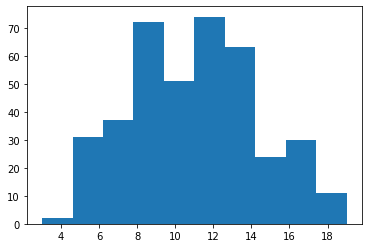

In [13]:
plt.hist(copy['G1'])

### Histogram of Grade G2

(array([13.,  0., 16., 35., 82., 81., 78., 57., 18., 15.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

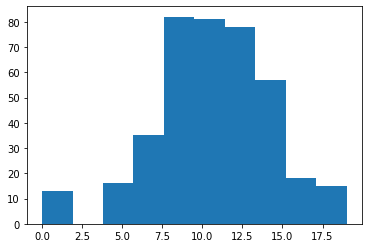

In [14]:
plt.hist(copy['G2'])

### Histogram of Grade G3

(array([ 38.,   0.,   8.,  24.,  60., 103.,  62.,  60.,  22.,  18.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

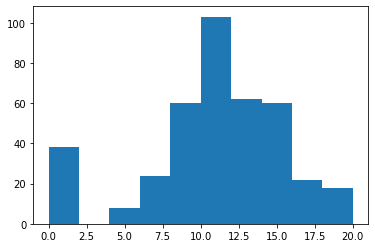

In [15]:
plt.hist(copy['G3'])

# Plotting Interesting Patterns

### 1. The Grades G1,G2,G3 highly correlate with each other as we can see in matrix and below figure

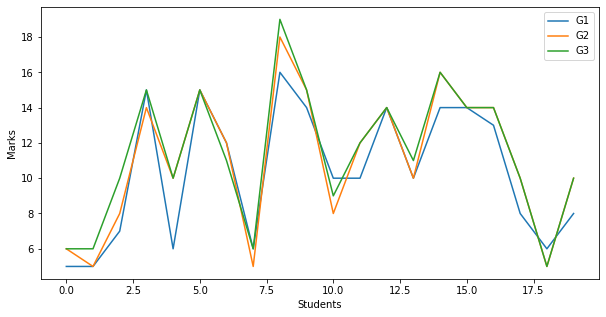

In [16]:
temp = copy.head(20)
plt.figure(figsize=(10,5))
plt.plot(temp['G1'],label='G1')
plt.plot(temp['G2'],label='G2')
plt.plot(temp['G3'],label='G3')
plt.xlabel("Students")
plt.ylabel("Marks")
plt.legend()

### Conclusion :
* The grades G1,G2,G3 share close relationship with each other.

### 2. Study Time and Grade G1

Text(0, 0.5, 'G1')

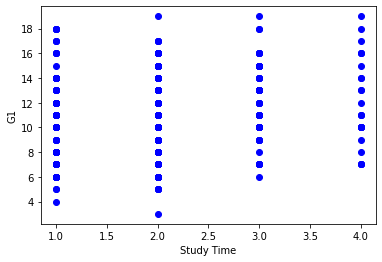

In [17]:
plt.scatter(copy.studytime,
            copy.G1,
            c='blue');
plt.xlabel("Study Time")
plt.ylabel("G1")

In [18]:
pd.crosstab(copy['studytime'],copy['G1'])

G1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
studytime,,,,,,,,,,,,,,,,,
1,0,1,2,12,10,16,5,10,11,9,6,10,1,4,3,5,0
2,1,0,5,11,17,23,20,26,18,20,15,13,14,10,4,0,1
3,0,0,0,1,6,1,5,9,7,5,10,5,8,5,0,2,1
4,0,0,0,0,4,1,1,6,3,1,2,2,1,3,1,1,1


### Conclusion :
* If a student studies 1 hour, there is high probability that, he will get marks between 6 to 14.
* If a student studies 2 hour, there is high probability that, he will get marks between 6 to 16.
* If a student studies 3 hour, he will definetely get marks greater than 5. Also there is high probability that, he will get marks between 10 to 16.
* If a student studies 4 hour, he will definitely get marks greater than 6.

### 3. Insights on School and Age of student

Text(0, 0.5, 'Age')

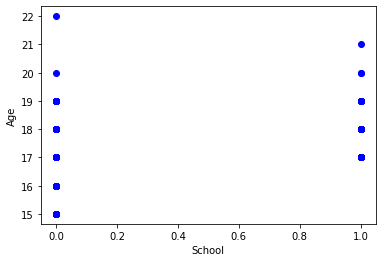

In [19]:
plt.scatter(copy.school,
            copy.age,
            c='blue');
plt.xlabel("School")
plt.ylabel("Age")

In [20]:
pd.crosstab(copy['school'],copy['age'])

age,15,16,17,18,19,20,21,22
school,,,,,,,,
0,82,104,86,57,18,1,0,1
1,0,0,12,25,6,2,1,0


### Conclusion :
* In school Mousinho da Silveira, all students are above age 16 and less than 22.
* All students below age 17 prefer school Gabriel Pereira.

### 4. Impact of Mother's education on student's grade

Text(0, 0.5, 'Grade')

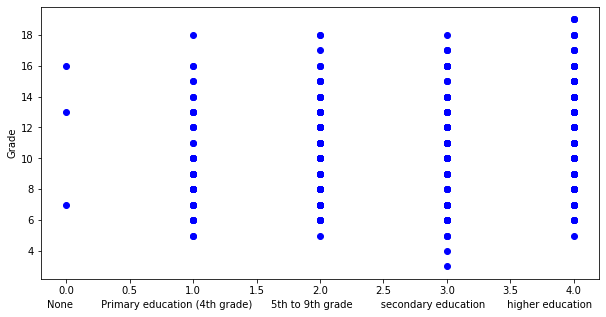

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(copy.Medu,
            copy.G1,
            c='blue');
plt.xlabel("None         Primary education (4th grade)      5th to 9th grade         secondary education       higher education")
plt.ylabel("Grade")

In [22]:
copy.Medu.value_counts().sort_values(axis='index',ascending=False)

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

Text(0, 0.5, 'Number Of Students')

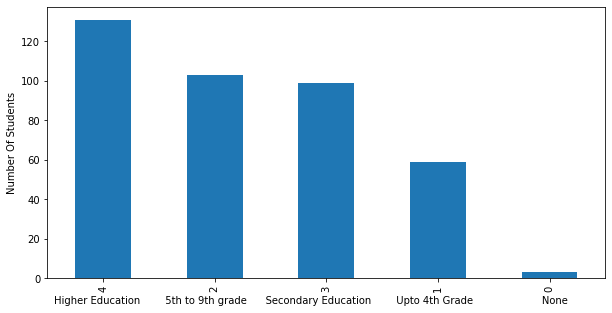

In [23]:
plt.figure(figsize=(10,5))
copy.Medu.value_counts().sort_values(axis='index',ascending=False).plot(kind="bar")
plt.xlabel("Higher Education        5th to 9th grade      Secondary Education        Upto 4th Grade                      None          ")
plt.ylabel("Number Of Students")

## Conclusion :
* The more educated the mother is, the better are the chances that the child will get education.

In [24]:
marks_ran = pd.crosstab(copy['Medu'],copy['G1'])
marks_ran

G1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Medu,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,2,5,6,13,8,6,2,4,5,3,2,2,0,1,0
2,0,0,1,6,10,14,7,14,14,12,8,6,5,3,1,2,0
3,1,1,3,8,13,5,7,11,9,11,7,8,3,8,3,1,0
4,0,0,1,5,7,9,9,20,14,8,12,13,14,8,4,4,3


In [25]:

marks_1to6 = list(marks_ran[3]+marks_ran[4]+marks_ran[5]+marks_ran[6])
marks_7to12 = list(marks_ran[7]+marks_ran[8]+marks_ran[9]+marks_ran[10]+marks_ran[11]+marks_ran[12])
marks_13to20 = list(marks_ran[13]+marks_ran[14]+marks_ran[15]+marks_ran[16]+marks_ran[17]+marks_ran[18]+marks_ran[19])

In [26]:
marks_range = pd.DataFrame({'1 to 6':marks_1to6,
                            '7 to 12':marks_7to12,
                            '13 to 20':marks_13to20},
                           index=['None','Upto 4th Grade','5th to 9th Grade','Secondary Education','Higher Education'])
marks_range

,1 to 6,7 to 12,13 to 20
None,0,1,2
Upto 4th Grade,7,39,13
5th to 9th Grade,7,71,25
Secondary Education,13,56,30
Higher Education,6,67,58


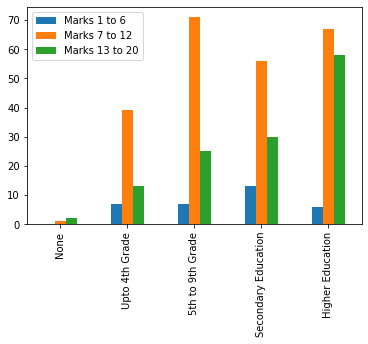

In [27]:
marks_range.plot(kind='bar')
plt.legend(('Marks 1 to 6','Marks 7 to 12','Marks 13 to 20'))

## Conclusion :
* For category 7 to 12 - If the mother has studied primary education (i.e. Upto 4th grade) or more, then there are more chances that the mother will motivate child to study and score marks above 7.
* For category 13 to 20 - We can see the increasing trend in above graph (in Green). Thus, the more educated the mother is, the better are the chances that student would be hardworking, score good marks and fall under this category.

## 5. Relationship between student's grade and previous failures

In [28]:
copy['failures'].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

In [29]:
pd.crosstab(copy['failures'],copy['G1'])

G1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
failures,,,,,,,,,,,,,,,,,
0,0,0,3,9,21,33,22,44,34,30,29,27,20,22,8,7,3
1,1,0,0,8,9,3,5,5,5,4,4,3,2,0,0,1,0
2,0,1,1,3,4,1,3,1,0,1,0,0,2,0,0,0,0
3,0,0,3,4,3,4,1,1,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Grade')

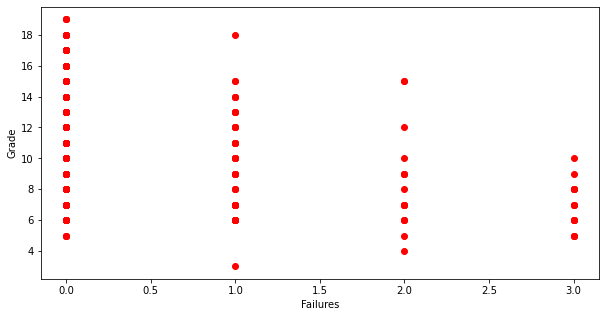

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(copy.failures,
            copy.G1,
            c='red');
plt.xlabel("Failures")
plt.ylabel("Grade")

### Conclusions :
* For student to score more than 15 marks, he must be having 0 failure.
* The student having 0 failure, is more likely to score marks between 7 to 16.
* The student having 1 failure, is more likely to score marks less than or equal to 15.
* The student having 2 or 3 failure, is more likely to score marks less than or equal to 10.

### 6. Higher Education

Text(0, 0.5, 'Grade')

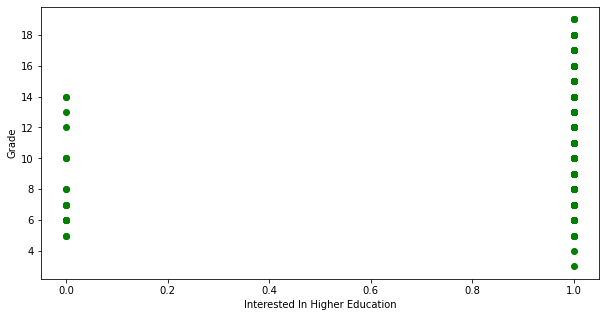

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(copy.higher,
            copy.G1,
            c='green');
plt.xlabel("Interested In Higher Education")
plt.ylabel("Grade")

In [32]:
pd.crosstab(copy['higher'],copy['G1'])

G1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
higher,,,,,,,,,,,,,,,,,
0,0,0,2,5,4,2,0,3,0,1,1,2,0,0,0,0,0
1,1,1,5,19,33,39,31,48,39,34,32,28,24,22,8,8,3


### Conclusion :
* The student scoring more than 14 marks, will be definitely taking higher education.
* There is a high probability that students who are interested in taking higher education will be scoring marks more than 8.

### 7. Weekly alcohol consumption and Study time

In [33]:
pd.crosstab(copy['Walc'],copy['studytime'])

studytime,1,2,3,4
Walc,,,,
1,24,77,33,17
2,25,41,15,4
3,21,42,14,3
4,22,26,2,1
5,13,12,1,2


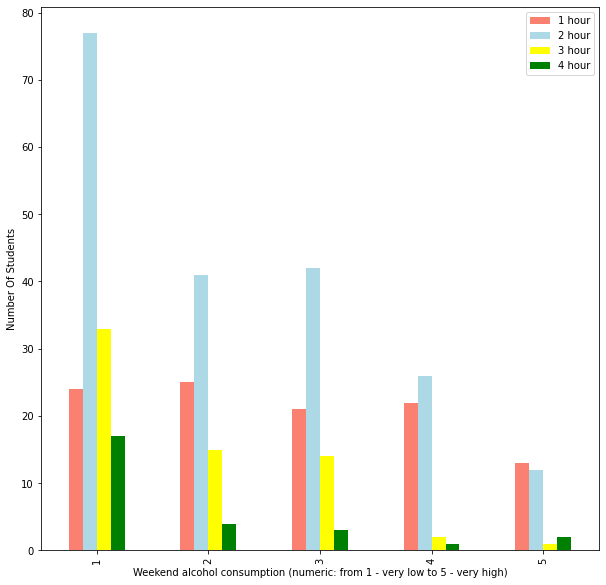

In [34]:
pd.crosstab(copy['Walc'],copy['studytime']).plot(kind='bar',figsize=(10,10),color=['salmon','lightblue','yellow','green'])
plt.xlabel("Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.ylabel("Number Of Students")
plt.legend(('1 hour','2 hour','3 hour','4 hour'))

### Conclusion :
* The less alcohol the student consumes, the more is the time that he spends to study.

### 8. Higher Studies and Failures

In [35]:
pd.crosstab(copy['higher'],copy['failures'])

failures,0,1,2,3
higher,,,,
0,7,6,1,6
1,305,44,16,10


Text(0, 0.5, 'Interested In Higher Studies (0 for No , 1 for Yes)')

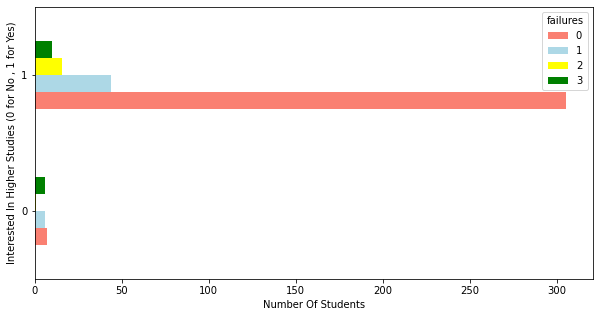

In [36]:
pd.crosstab(copy['higher'],copy['failures']).plot(kind='barh',figsize=(10,5),color=['salmon','lightblue','yellow','green'])
plt.xlabel("Number Of Students")
plt.ylabel("Interested In Higher Studies (0 for No , 1 for Yes)")

### Conclusion :
* If the student has 0 failures, then there is very high chance that he will be taking higher education.


### 9. Family Support and Extra paid classes

In [37]:
pd.crosstab(copy['famsup'],copy['paid'])

paid,0,1
famsup,,
0,111,42
1,103,139


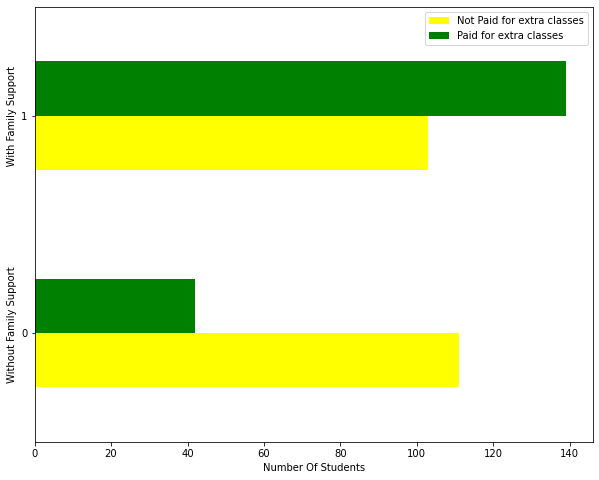

In [38]:
pd.crosstab(copy['famsup'],copy['paid']).plot(kind='barh',figsize=(10,8),color=['yellow','green'])
plt.xlabel("Number Of Students")
plt.ylabel("Without Family Support                                With Family Support")
plt.legend(('Not Paid for extra classes', 'Paid for extra classes'))

### Conclusion :
* Out of all the students who are taking paid extra classes, 75% has family educational support.

### 10. Weekend alcohol consumption and Go out

In [39]:
pd.crosstab(copy['address'],copy['internet'])

internet,0,1
address,,
0,28,60
1,38,269


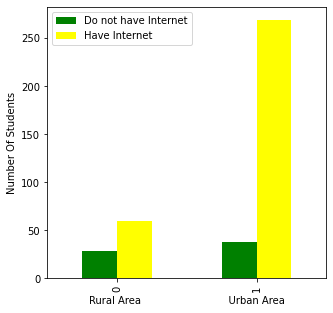

In [40]:
pd.crosstab(copy['address'],copy['internet']).plot(kind='bar',figsize=(5,5),color=['green','yellow'])
plt.xlabel("Rural Area                            Urban Area")
plt.ylabel("Number Of Students")
plt.legend(('Do not have Internet','Have Internet'))

### Conclusion :
* Majority of students who lives is Urban area has internet connection.
* Even in rural area, number of students having internet is greater than who do not having internet.

In [41]:
copy.shape

(395, 33)

In [42]:
np.random.seed(42)
copy = copy.sample(frac=1)
copy = copy.sample(frac=1)
copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
194,0,1,16,1,0,1,2,3,2,2,1,0,2,1,0,0,0,0,0,1,1,1,0,5,3,3,1,1,3,0,13,14,14
261,0,1,18,1,0,1,4,3,4,2,0,1,1,2,0,0,1,1,0,0,1,1,0,4,3,2,1,1,3,2,8,8,8
277,0,1,18,1,0,1,4,4,4,3,1,1,2,1,0,0,0,1,1,1,1,1,0,3,2,4,1,4,3,22,9,9,9
351,1,1,17,1,0,1,3,3,1,2,0,1,2,2,0,0,1,1,0,1,1,1,0,4,5,4,2,3,3,2,13,13,13
23,0,1,16,1,1,1,2,2,2,2,3,1,2,2,0,0,1,0,1,1,1,1,0,5,4,4,2,4,5,0,13,13,12


In [43]:
np.random.seed(1)

from sklearn.model_selection import train_test_split

A = copy.drop("G3", axis=1)
B = copy["G3"]

a_train , ft1 , b_train , ft2 = train_test_split(A,B, test_size=0.15)

In [44]:
print("Shape of Training data :",a_train.shape)
print("-"*50)
print("Shape of Test data :",ft1.shape)
print("-"*50)
print("Shape of Training data Target:",b_train.shape)
print("-"*50)
print("Shape of Training data Target:",ft2.shape)

Shape of Training data : (335, 32)
--------------------------------------------------
Shape of Test data : (60, 32)
--------------------------------------------------
Shape of Training data Target: (335,)
--------------------------------------------------
Shape of Training data Target: (60,)


In [45]:
a_train['G3']=b_train
a_train.head()

<ipython-input-45-e80c9feabe43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_train['G3']=b_train


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
179,0,1,17,1,0,1,4,3,2,2,0,1,1,2,0,0,1,0,1,1,1,1,1,5,2,3,1,1,2,4,10,10,11
87,0,0,15,1,0,1,4,2,2,2,3,1,1,3,0,0,1,0,1,1,1,1,0,5,3,3,1,3,1,4,13,14,14
155,0,1,15,0,0,1,2,3,0,3,0,1,1,2,0,1,0,1,1,1,1,0,0,4,4,4,1,1,1,2,11,8,8
146,0,0,15,1,0,1,3,2,1,3,1,0,1,2,3,0,1,0,0,1,1,1,0,3,3,2,1,1,3,0,6,7,0
8,0,1,15,1,1,0,3,2,3,2,1,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,16,18,19


In [46]:
a_train.shape

(335, 33)

## Applying Random Forest Regressor 

In [47]:
%%time
np.random.seed(16)


P = a_train.drop("G3", axis=1)
J = a_train["G3"]

l_train , l_test , m_train , m_test = train_test_split(P,J, test_size=0.2)

reg1 = RandomForestRegressor(n_estimators=100)
reg1.fit(l_train,m_train)
reg1.score(l_test,m_test)

Wall time: 1.03 s


0.9052103786592357

In [48]:
preds1 = reg1.predict(ft1)
preds1

array([12.47, 16.25,  9.38, 17.62,  9.48, 12.62,  9.63, 14.28, 11.37,
        0.43, 11.37,  6.07, 15.63,  8.49, 11.07, 16.55, 16.13,  7.37,
       11.15, 10.86,  3.36, 10.91,  9.68,  7.05, 15.47,  9.36,  7.65,
       15.08, 12.83, 11.47, 12.66,  6.7 , 11.27, 15.2 , 15.36, 13.76,
        8.58, 10.36, 16.26, 10.68,  3.67,  8.83,  6.07,  4.3 ,  6.09,
        6.71,  9.8 ,  9.16,  9.64, 14.3 , 10.82, 10.76, 11.46,  8.99,
        0.96, 13.87, 10.84,  8.73, 10.48, 16.31])

In [49]:
np.matrix(ft2)

matrix([[13, 16, 12, 17,  9, 13, 10, 15, 10,  0, 12,  6, 15,  8, 10, 15,
         15,  8, 12, 11,  8, 11, 10,  8, 15,  9,  8, 16, 12, 11, 13,  9,
         11, 15, 15, 15,  8, 11, 17, 11,  0,  9,  5,  6,  8,  7,  9,  7,
         10, 13, 11, 12, 12,  7,  0, 14, 10, 10, 11, 16]], dtype=int64)

In [50]:
# Know what is coefficient of determination or R^2, by pressing shift+tab in score() function. 
reg1.score(ft1,ft2)

0.899483515862095

In [51]:
# We can also call r2_score as below
from sklearn.metrics import r2_score
r2_score(preds1,ft2)


0.8990959030760565

In [52]:
r2_data = r2_score(preds1,ft2)

In [53]:
tmean = ft2.mean()
tmean = np.full(len(ft2),ft2.mean())
tmean.shape

(60,)

In [54]:
# Below score is also measured in R-squared
reg1.score(ft1,tmean)

0.0

In [55]:
r2_score(ft2,tmean)

0.0

In [56]:
r2_score(ft2,ft2)

1.0

0.8793333333333334

In [58]:
mae_data = pd.DataFrame({'Actual Values':ft2,
                         'Predicted Values':preds1})
mae_data['Difference'] = mae_data['Actual Values']-mae_data['Predicted Values']
print("Mean Absolute Error is the average of differences between all actual values and all predicted values. It is ",round(mae,3),"for below data.")
mae_data

Mean Absolute Error is the average of differences between all actual values and all predicted values. It is  0.879 for below data.


,Actual Values,Predicted Values,Difference
108,13,12.47,0.53
59,16,16.25,-0.25
33,12,9.38,2.62
101,17,17.62,-0.62
175,9,9.48,-0.48
50,13,12.62,0.38
4,10,9.63,0.37
34,15,14.28,0.72
172,10,11.37,-1.37
136,0,0.43,-0.43


1.48125

In [60]:
squared = np.square(mae_data['Difference'])
mae_data['Squared Difference'] = squared
print("Mean Squared Error is :",squared.mean())
mae_data

Mean Squared Error is : 1.4812499999999995


,Actual Values,Predicted Values,Difference,Squared Difference
108,13,12.47,0.53,0.2809
59,16,16.25,-0.25,0.0625
33,12,9.38,2.62,6.8644
101,17,17.62,-0.62,0.3844
175,9,9.48,-0.48,0.2304
50,13,12.62,0.38,0.1444
4,10,9.63,0.37,0.1369
34,15,14.28,0.72,0.5184
172,10,11.37,-1.37,1.8769
136,0,0.43,-0.43,0.1849


In [61]:
print("The Evaluation of our RandomForestRegressor model is as below :")
print(" :",round(mae,3))
print("MAE :",round(mae,3))
print("MSE :",round(mse,3))

The Evaluation of our RandomForestRegressor model is as below :
R^2 : 0.899
MAE : 0.879
MSE : 1.481


0.8571456209553665

0.8571456209553665

0.8551344023084266